# ChatGPT User Reviews <br>
<p><img src="datasets/Cover.jpg" alt="" width="600px"></p>




### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import *
from wordcloud import *
from sklearn import *
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import *
from sklearn.tree import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### **Step1**: Acquire
<pre><b> • Explore problem<b> </pre>
<pre><b> • Identify data<b> </pre>
<pre><b> • Import data<b> </pre>

### **Data**
#### <pre><b>• Import and read the data</pre>

In [2]:
df=pd.read_csv('datasets/clean_chatgpt_reviews.csv')
df.head()

,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149719 entries, 0 to 149718
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     149719 non-null  int64 
 1   userName       149719 non-null  object
 2   content        149719 non-null  object
 3   score          149719 non-null  int64 
 4   thumbsUpCount  149719 non-null  int64 
 5   at             149719 non-null  object
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [4]:
df.duplicated().value_counts()

False    149719
dtype: int64

### **Step2**: Prepare
<pre><b> • Explore data<b> </pre>
<pre><b> • Visualize ideas<b> </pre>
<pre><b> • Cleaning data<b> </pre>


In [5]:
df.drop_duplicates(inplace=True)
df.shape

(149719, 6)

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(10)

,userName,content,score,thumbsUpCount,at
0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50
5,LEISHA PALLETT,this is the best app I've ever seen!!!,5,0,28-06-2024 20:45
6,M Rizwan,very Nice app,5,0,28-06-2024 20:41
7,Mehdi Hajavi,Your guidance is really great and you can answ...,5,0,28-06-2024 20:39
8,Habimana Therese,This app is very important but sometimes it gi...,4,0,28-06-2024 20:35
9,Xhx Bvj,Absolutely fantastic app. ChatGPT is such a ve...,5,0,28-06-2024 20:29


In [7]:
df.isnull().sum()

userName         0
content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

### **Step3**: Analyze
<pre><b> • Feature selection<b> </pre>
<pre><b> • Model selection<b> </pre>
<pre><b> • Analyze data<b> </pre>

In [8]:
df['time'] = pd.to_datetime(df['at'], format='%d-%m-%Y %H:%M')
df.drop(columns=['at'],inplace=True)
df.head()

,userName,content,score,thumbsUpCount,time
0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,2024-06-28 21:07:00
1,Muhammad bassam adam,perfect,5,0,2024-06-28 20:56:00
2,Chinaza Okoli,its been so helpful...love it,5,0,2024-06-28 20:54:00
3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,2024-06-28 20:51:00
4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,2024-06-28 20:50:00


In [9]:
df[df['thumbsUpCount']==df['thumbsUpCount'].max()]

,userName,content,score,thumbsUpCount,time
38148,Jonathan Lawrence,"it's really brilliant, I mean it's dumb as a b...",5,1193,2023-12-25 17:13:00


In [10]:
def featureScaling(X,a,b):
    X = np.array(X)
    Normalized_X=np.zeros((X.shape[0],X.shape[1]))
    for i in range(X.shape[1]):
        Normalized_X[:,i]=((X[:,i]-min(X[:,i]))/(max(X[:,i])-min(X[:,i])))*(b-a)+a
    return Normalized_X

In [11]:
df['thumbsUpCount']=featureScaling(df[['thumbsUpCount']],0,1)
df.head()

,userName,content,score,thumbsUpCount,time
0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0.0,2024-06-28 21:07:00
1,Muhammad bassam adam,perfect,5,0.0,2024-06-28 20:56:00
2,Chinaza Okoli,its been so helpful...love it,5,0.0,2024-06-28 20:54:00
3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0.0,2024-06-28 20:51:00
4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0.0,2024-06-28 20:50:00


In [12]:
def clean_text(text):
    all_list = [char for char in text if char not in string.punctuation]
    text=''.join(all_list)
    text=text.lower()
    return text   

In [13]:
df['content']=df['content'].apply(clean_text)
stop=stopwords.words('english')
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,userName,content,score,thumbsUpCount,time
0,T H (Trudylh20),excellent im impressed 👌 👏,5,0.0,2024-06-28 21:07:00
1,Muhammad bassam adam,perfect,5,0.0,2024-06-28 20:56:00
2,Chinaza Okoli,helpfullove,5,0.0,2024-06-28 20:54:00
3,Project House Group Ltd,amazing tools help lot work,5,0.0,2024-06-28 20:51:00
4,Safoan Riyad,enjoyed chatgpt last update ruined everything ...,1,0.0,2024-06-28 20:50:00


In [14]:
df['score'].value_counts()

5    113738
4     17581
1      9555
3      6256
2      2589
Name: score, dtype: int64

In [15]:
df['class']=df['score'].replace({5:'high',4:'high',3:'mid',2:'low',1:'low'})

In [16]:
df['year'] = df['time'].dt.to_period('Y').astype(str)
df['month'] = df['time'].dt.to_period('M').astype(str)

In [17]:
df.head()

,userName,content,score,thumbsUpCount,time,class,year,month
0,T H (Trudylh20),excellent im impressed 👌 👏,5,0.0,2024-06-28 21:07:00,high,2024,2024-06
1,Muhammad bassam adam,perfect,5,0.0,2024-06-28 20:56:00,high,2024,2024-06
2,Chinaza Okoli,helpfullove,5,0.0,2024-06-28 20:54:00,high,2024,2024-06
3,Project House Group Ltd,amazing tools help lot work,5,0.0,2024-06-28 20:51:00,high,2024,2024-06
4,Safoan Riyad,enjoyed chatgpt last update ruined everything ...,1,0.0,2024-06-28 20:50:00,low,2024,2024-06


### **Step4**: Report
<pre><b> • Present findings<b> </pre>
<pre><b> • Visualize results<b> </pre>
<pre><b> • Credibility counts<b> </pre>

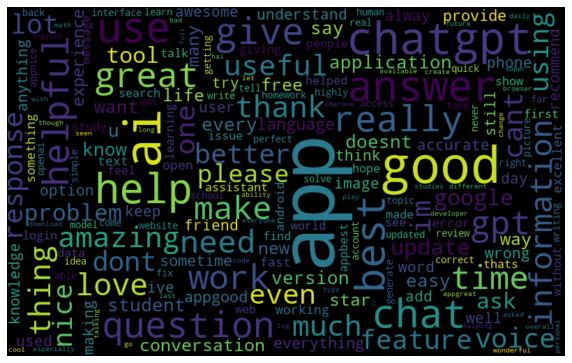

In [18]:
all_words=''.join([word for word in df['content']])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

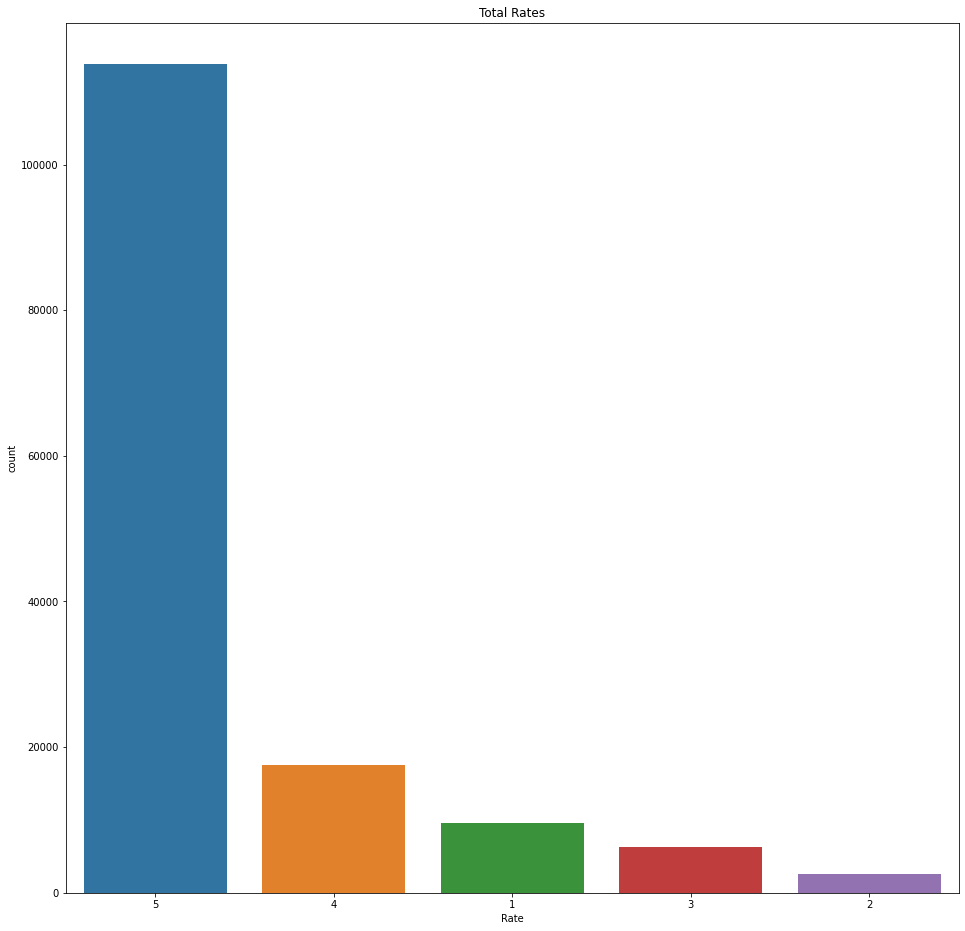

In [19]:
plt.figure(figsize=(16,16))
part_df=df.sort_values('score',ascending=False)
sns.countplot(x=part_df['score'],order=df['score'].value_counts(ascending=False).index)
plt.xlabel('Rate')
plt.title('Total Rates')
plt.show()


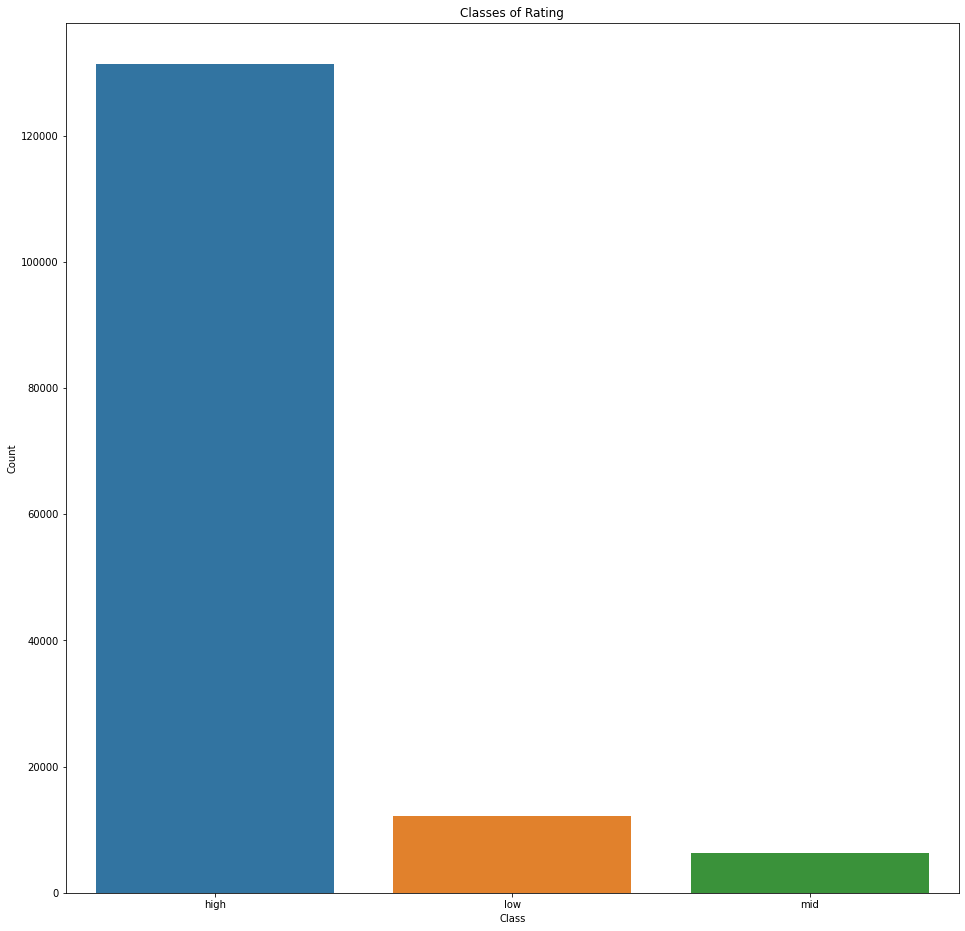

In [20]:
plt.figure(figsize=(16,16))
sns.countplot(df['class'])
plt.xlabel('Class');plt.ylabel('Count');plt.title('Classes of Rating')
plt.show()

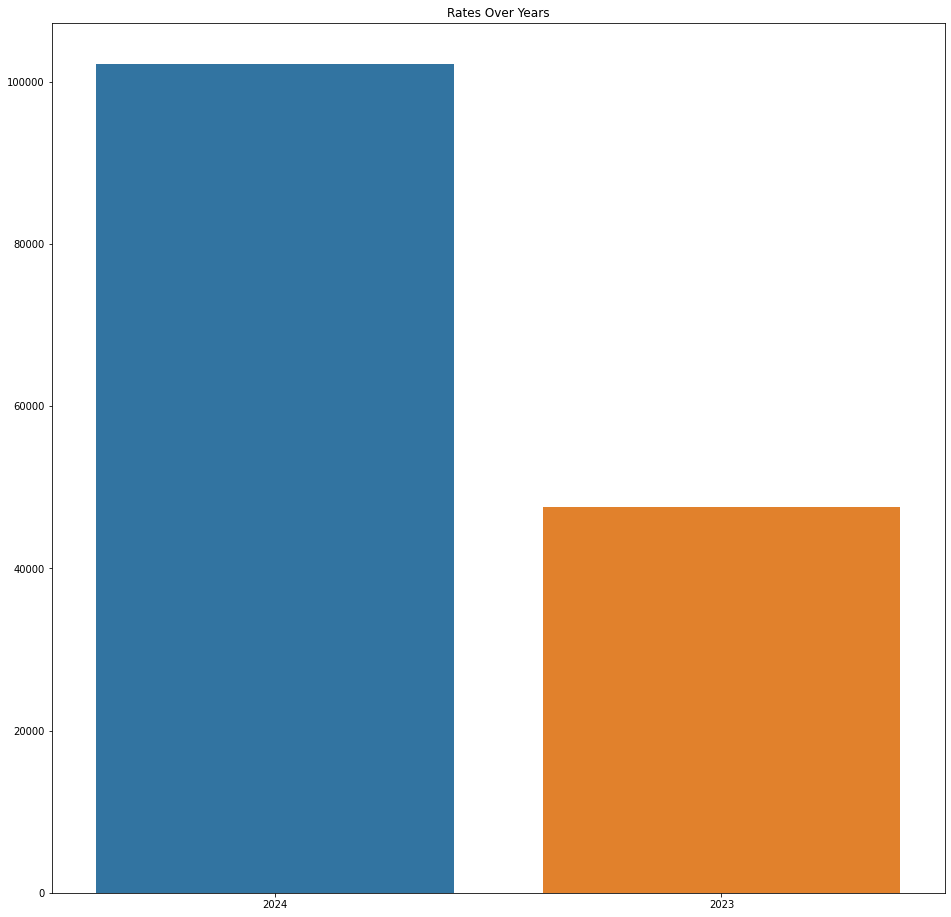

In [21]:
plt.figure(figsize=(16,16))
sns.barplot(x=df['year'].value_counts().index,y=df['year'].value_counts().values)
plt.title('Rates Over Years')
plt.show()


Text(0.5, 1.0, 'Avarge Score over month')

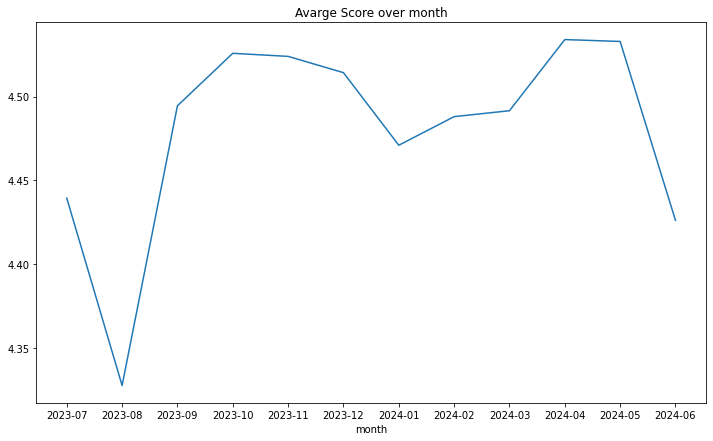

In [22]:
avg_scores=df.groupby('month')['score'].mean()
plt.figure(figsize=(12,7))
sns.lineplot(x=avg_scores.index,y=avg_scores.values)
plt.title('Avarge Score over month')

In [23]:
df.to_csv('Final.csv')